# This script takes a set of KEGG categories ('Subgroup2') that were significantly differentially abundant between two groups, identifies the individual KOs within each category that were significantly different, and plots those genes only in a heat map.
# You should have a working directory containing (1) the file of normalized read counts for each gene (KO), and (2) a list of significantly different genes (KOs)

In [1]:
import os as os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/Users/npatin3/miniconda/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Navigate to working directory
os.chdir('/Users/npatin3/Dropbox (GaTech)/Norovirus/Annotation/kofamscan/Assemblies/Asymp_vs_symp')

In [3]:
path = "Asymp_vs_symp_KOs_readcounts.csv"

In [4]:
kos = pd.read_csv(path, header=0)
kos.head()

,Group,Subgroup,Subgroup2,KO,Function,ReadCounts,Sample,GE,ReadCounts_Norm,dataset
0,Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis [PATH:ko00010],K00844,HK; hexokinase [EC:2.7.1.1],1,13_1,548,0.001825,Asymptomatic
1,Metabolism,Carbohydrate metabolism,Fructose and mannose metabolism [PATH:ko00051],K00844,HK; hexokinase [EC:2.7.1.1],1,13_1,548,0.001825,Asymptomatic
2,Metabolism,Carbohydrate metabolism,Galactose metabolism [PATH:ko00052],K00844,HK; hexokinase [EC:2.7.1.1],1,13_1,548,0.001825,Asymptomatic
3,Metabolism,Carbohydrate metabolism,Starch and sucrose metabolism [PATH:ko00500],K00844,HK; hexokinase [EC:2.7.1.1],1,13_1,548,0.001825,Asymptomatic
4,Metabolism,Carbohydrate metabolism,Amino sugar and nucleotide sugar metabolism [P...,K00844,HK; hexokinase [EC:2.7.1.1],1,13_1,548,0.001825,Asymptomatic


In [5]:
# Remove [PATH:] part of Subgroup2 category name
kos[['Subgroup2', 'PATH']] = kos['Subgroup2'].str.split("[", n=1, expand=True)
kos = kos.drop('PATH', axis=1)
kos.head()

,Group,Subgroup,Subgroup2,KO,Function,ReadCounts,Sample,GE,ReadCounts_Norm,dataset
0,Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis,K00844,HK; hexokinase [EC:2.7.1.1],1,13_1,548,0.001825,Asymptomatic
1,Metabolism,Carbohydrate metabolism,Fructose and mannose metabolism,K00844,HK; hexokinase [EC:2.7.1.1],1,13_1,548,0.001825,Asymptomatic
2,Metabolism,Carbohydrate metabolism,Galactose metabolism,K00844,HK; hexokinase [EC:2.7.1.1],1,13_1,548,0.001825,Asymptomatic
3,Metabolism,Carbohydrate metabolism,Starch and sucrose metabolism,K00844,HK; hexokinase [EC:2.7.1.1],1,13_1,548,0.001825,Asymptomatic
4,Metabolism,Carbohydrate metabolism,Amino sugar and nucleotide sugar metabolism,K00844,HK; hexokinase [EC:2.7.1.1],1,13_1,548,0.001825,Asymptomatic


In [6]:
# Exclude irrelevant categories
kos2 = kos.loc[(kos['Group'] != 'Human Diseases') & 
               (kos['Group'] != 'Brite Hierarchies') & 
               (kos['Group'] != 'Organismal Systems') &
               (kos['Subgroup'] != 'Cellular community - eukaryotes')]

## Subset the dataframe for only categories of interest

In [7]:
kos2.set_index(keys=['Subgroup2'], drop=False, inplace=True)
kos2.head()

,Group,Subgroup,Subgroup2,KO,Function,ReadCounts,Sample,GE,ReadCounts_Norm,dataset
Subgroup2,,,,,,,,,,
Glycolysis / Gluconeogenesis,Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis,K00844,HK; hexokinase [EC:2.7.1.1],1,13_1,548,0.001825,Asymptomatic
Fructose and mannose metabolism,Metabolism,Carbohydrate metabolism,Fructose and mannose metabolism,K00844,HK; hexokinase [EC:2.7.1.1],1,13_1,548,0.001825,Asymptomatic
Galactose metabolism,Metabolism,Carbohydrate metabolism,Galactose metabolism,K00844,HK; hexokinase [EC:2.7.1.1],1,13_1,548,0.001825,Asymptomatic
Starch and sucrose metabolism,Metabolism,Carbohydrate metabolism,Starch and sucrose metabolism,K00844,HK; hexokinase [EC:2.7.1.1],1,13_1,548,0.001825,Asymptomatic
Amino sugar and nucleotide sugar metabolism,Metabolism,Carbohydrate metabolism,Amino sugar and nucleotide sugar metabolism,K00844,HK; hexokinase [EC:2.7.1.1],1,13_1,548,0.001825,Asymptomatic


In [8]:
# get a list of category names
names=kos2['Subgroup2'].unique().tolist()
names

['Glycolysis / Gluconeogenesis ',
 'Fructose and mannose metabolism ',
 'Galactose metabolism ',
 'Starch and sucrose metabolism ',
 'Amino sugar and nucleotide sugar metabolism ',
 'Streptomycin biosynthesis ',
 'Neomycin, kanamycin and gentamicin biosynthesis ',
 'HIF-1 signaling pathway ',
 'Pentose phosphate pathway ',
 'Methane metabolism ',
 'RNA degradation ',
 'AMPK signaling pathway ',
 'Carbon fixation in photosynthetic organisms ',
 'Inositol phosphate metabolism ',
 'Glycine, serine and threonine metabolism ',
 'Pyruvate metabolism ',
 'Purine metabolism ',
 'Citrate cycle (TCA cycle) ',
 'Glyoxylate and dicarboxylate metabolism ',
 'Propanoate metabolism ',
 'Valine, leucine and isoleucine degradation ',
 'Lysine degradation ',
 'Tryptophan metabolism ',
 'Butanoate metabolism ',
 'Carbon fixation pathways in prokaryotes ',
 'Nitrotoluene degradation ',
 'Cysteine and methionine metabolism ',
 'Fatty acid degradation ',
 'Tyrosine metabolism ',
 'Chloroalkane and chloroalk

In [10]:
# Show the data sets being compared (in this case, symptomatic and asymptomatic)
datasets=kos2['dataset'].unique().tolist()
datasets

['Asymptomatic', 'Symptomatic']

#### Function to subset the dataframe based on Subgroup2 name

In [11]:
def make_subgroup2_df(df, subgroup2):
    sub_df = df.loc[df.Subgroup2=='%s' % subgroup2]
    return(sub_df)

### Use the function to loop through the list of categories of interest and make a new dataframe only containing those categories

In [12]:
names = ['Glycan metabolism','Sphingolipid metabolism ','ABC transporters ','Quorum sensing ']

In [13]:
subgroups = []
for name in names:
    subgroup = make_subgroup2_df(kos2, name)
    subgroups.append(subgroup)
    
subgroups_df = pd.concat(subgroups)

In [14]:
subgroups_df.head()

,Group,Subgroup,Subgroup2,KO,Function,ReadCounts,Sample,GE,ReadCounts_Norm,dataset
Subgroup2,,,,,,,,,,
Glycan metabolism,Not Included in Pathway or Brite,Unclassified: metabolism,Glycan metabolism,K03208,wcaI; colanic acid biosynthesis glycosyl tran...,1,38_1,456,0.002193,Asymptomatic
Glycan metabolism,Not Included in Pathway or Brite,Unclassified: metabolism,Glycan metabolism,K16710,"wcaK, amsJ; colanic acid/amylovoran biosynthe...",1,49_1,649,0.001541,Asymptomatic
Glycan metabolism,Not Included in Pathway or Brite,Unclassified: metabolism,Glycan metabolism,K19294,algI; alginate O-acetyltransferase complex pr...,10,28_1,839,0.011919,Asymptomatic
Glycan metabolism,Not Included in Pathway or Brite,Unclassified: metabolism,Glycan metabolism,K19294,algI; alginate O-acetyltransferase complex pr...,13,13_1,548,0.023723,Asymptomatic
Glycan metabolism,Not Included in Pathway or Brite,Unclassified: metabolism,Glycan metabolism,K19294,algI; alginate O-acetyltransferase complex pr...,13,41_1,686,0.018950,Asymptomatic


In [15]:
# Reformat data frame to make it more simple and concise
subgroups_df = subgroups_df[['KO','Subgroup2','Sample','ReadCounts_Norm', 'dataset']]
subgroups_df.reset_index(drop=True, inplace=True)
subgroups_df.head()

,KO,Subgroup2,Sample,ReadCounts_Norm,dataset
0,K03208,Glycan metabolism,38_1,0.002193,Asymptomatic
1,K16710,Glycan metabolism,49_1,0.001541,Asymptomatic
2,K19294,Glycan metabolism,28_1,0.011919,Asymptomatic
3,K19294,Glycan metabolism,13_1,0.023723,Asymptomatic
4,K19294,Glycan metabolism,41_1,0.018950,Asymptomatic


## Select only the individual KOs from this category that were significantly different

### Import the list of significantly different KOs

In [16]:
kos_sigdiff = pd.read_csv("sig_diff_KOs.csv", index_col=0)
kos_sigdiff.head()

,K00036,K00145,K00297,K00343,K00549,K00656,K00705,K00757,K00761,K00806,...,K15633,K15771,K15923,K16363,K17319,K17320,K19294,K20487,K21574,K21636
Sample,,,,,,,,,,,,,,,,,,,,,
4_1,0.001541,0.010965,0.002963,1.000000e-09,0.007023,0.080851,0.001541,1.184535e-02,7.288630e-03,0.028509,...,0.006788,1.232666e-02,0.009245,3.994073e-03,0.016423,0.012327,0.003650,1.341663e-02,0.009124,0.005121
15_1,0.001867,0.010727,0.001508,1.000000e-09,0.007023,0.100560,0.009124,1.724651e-02,1.457726e-02,0.027414,...,0.006306,1.642336e-02,0.020073,1.000000e-09,0.013158,0.016423,0.004386,2.206008e-02,0.007299,0.009120
36_1,0.001867,0.010949,0.004557,1.540832e-03,0.010217,0.058940,0.004373,1.205026e-02,1.535088e-02,0.023723,...,0.002683,2.623907e-02,0.007289,1.000000e-09,0.012327,0.026239,0.003082,1.933085e-02,0.002915,0.005601
37_1,0.001867,0.007289,0.005837,1.540832e-03,0.005578,0.042837,0.006579,1.063244e-02,7.704160e-03,0.036443,...,0.003287,1.315789e-02,0.008772,1.692439e-03,0.008343,0.013158,0.001825,1.472745e-02,0.006579,0.004695
13_1,0.007299,0.003650,0.010949,9.124088e-03,0.003650,0.014599,0.010949,1.000000e-09,1.000000e-09,0.001825,...,0.012774,1.000000e-09,0.031022,3.649635e-03,0.003650,0.003650,0.023723,1.000000e-09,0.016423,0.009124


In [17]:
# Make a list from the column names (KOs)
kos_list = kos_sigdiff.columns.to_list()
kos_list

['K00036',
 'K00145',
 'K00297',
 'K00343',
 'K00549',
 'K00656',
 'K00705',
 'K00757',
 'K00761',
 'K00806',
 'K00817',
 'K00821',
 'K00847',
 'K00876',
 'K00925',
 'K00963',
 'K00975',
 'K01091',
 'K01133',
 'K01151',
 'K01181',
 'K01190',
 'K01207',
 'K01223',
 'K01270',
 'K01338',
 'K01358',
 'K01480',
 'K01580',
 'K01585',
 'K01591',
 'K01652',
 'K01676',
 'K01677',
 'K01738',
 'K01740',
 'K01776',
 'K01785',
 'K01803',
 'K01809',
 'K01811',
 'K01815',
 'K01868',
 'K01872',
 'K01874',
 'K01892',
 'K01897',
 'K01915',
 'K01937',
 'K01939',
 'K01995',
 'K01998',
 'K02005',
 'K02031',
 'K02038',
 'K02227',
 'K02314',
 'K02316',
 'K02871',
 'K02959',
 'K02996',
 'K03328',
 'K03517',
 'K03531',
 'K03612',
 'K03628',
 'K03654',
 'K03657',
 'K03701',
 'K03702',
 'K03703',
 'K03763',
 'K03783',
 'K03787',
 'K04066',
 'K04079',
 'K04487',
 'K04517',
 'K04564',
 'K04720',
 'K05349',
 'K05515',
 'K05970',
 'K06217',
 'K06400',
 'K06881',
 'K06959',
 'K07017',
 'K07085',
 'K07088',
 'K07133',

### Use the list of significantly different KOs to select from the subgroup2

In [18]:
df2 = subgroups_df.loc[subgroups_df['KO'].isin(kos_list)]

#### Sanity check: df2 should be much smaller than subgroups_df

In [19]:
subgroups_df.shape

(833, 5)

In [20]:
df2.shape

(113, 5)

In [21]:
df2.head()

,KO,Subgroup2,Sample,ReadCounts_Norm,dataset
2,K19294,Glycan metabolism,28_1,0.011919,Asymptomatic
3,K19294,Glycan metabolism,13_1,0.023723,Asymptomatic
4,K19294,Glycan metabolism,41_1,0.018950,Asymptomatic
5,K19294,Glycan metabolism,38_1,0.017544,Asymptomatic
6,K19294,Glycan metabolism,49_1,0.010786,Asymptomatic


## Final format for clustermap

In [22]:
df3 = pd.pivot_table(data=df2, index='Sample', values='ReadCounts_Norm', columns='KO')
df3 = df3.fillna(0)
# Log-transform if necessary
df3_log = np.log(df3.replace(0, 0.0000001))
# Square-root transform if necessary
df3_sqrt = np.sqrt(df3.replace(0, 0.0000001))

## Set palette for color bar showing sample group (asymptomatic vs symptomatic)

In [23]:
palette_df = kos[['KO','Sample','dataset']]
palette_df.head()

,KO,Sample,dataset
0,K00844,13_1,Asymptomatic
1,K00844,13_1,Asymptomatic
2,K00844,13_1,Asymptomatic
3,K00844,13_1,Asymptomatic
4,K00844,13_1,Asymptomatic


In [24]:
my_palette = dict(zip(palette_df.dataset.unique(), ["purple","orange"]))
row_colors = palette_df.dataset.map(my_palette)
sampz = palette_df.Sample

In [25]:
sample_colors = sampz.to_frame().join(row_colors)
sample_colors = sample_colors.drop_duplicates(subset=['Sample'])
sample_colors = sample_colors.set_index('Sample')
sample_colors.head()

,dataset
Sample,
13_1,purple
28_1,purple
41_1,purple
38_1,purple
49_1,purple


## Make the heatmap

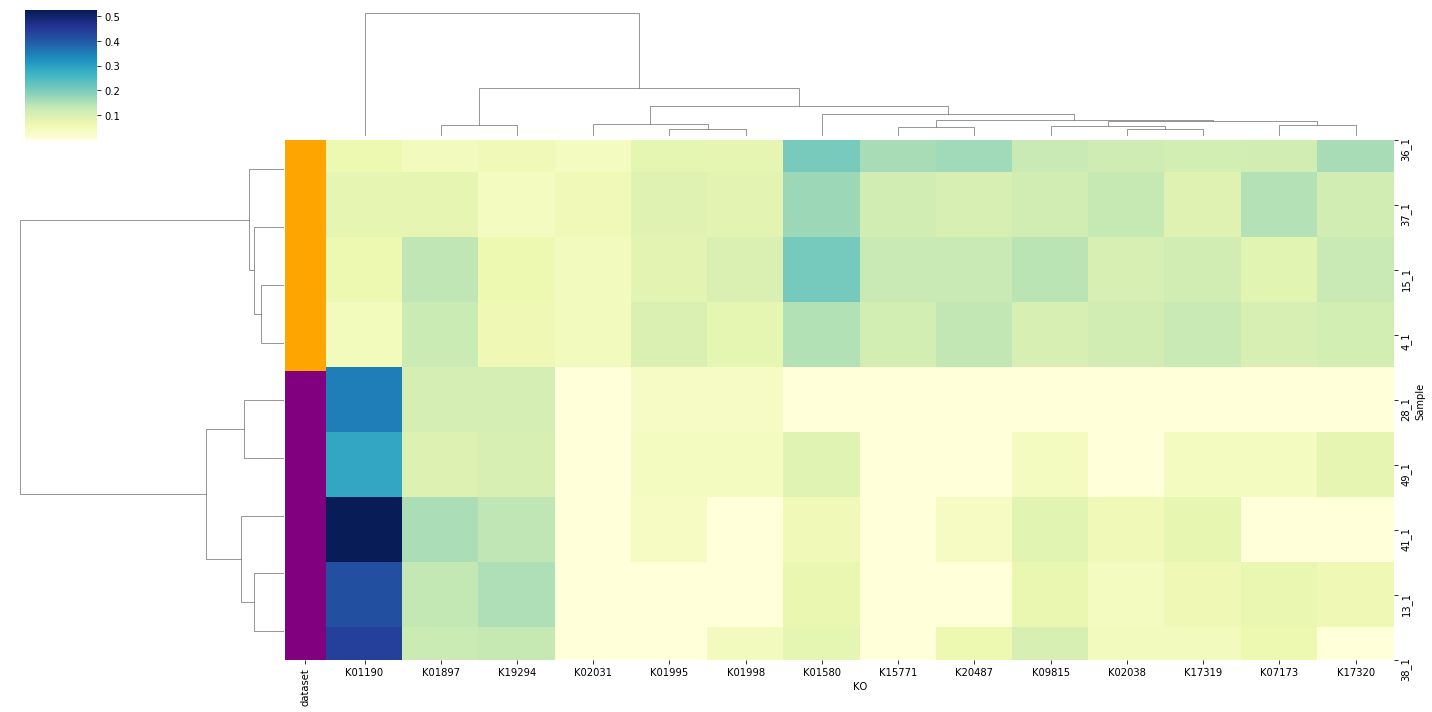

In [26]:
# Quick and dirty just to check
p = sns.clustermap(df3_sqrt, cmap='YlGnBu', figsize=(20,10), xticklabels=True, method='ward', metric='euclidean', 
                   row_colors = sample_colors)

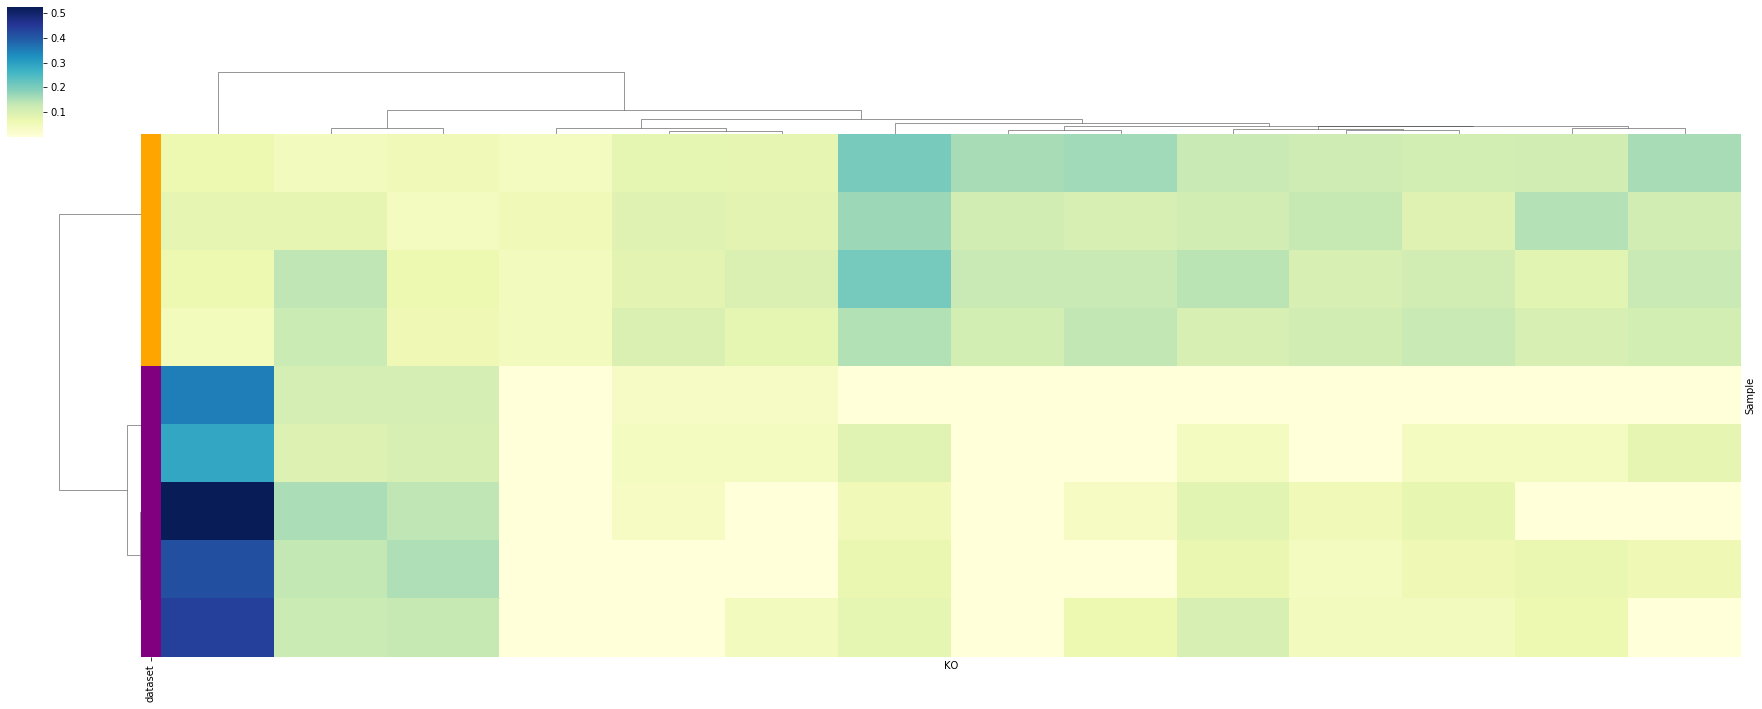

In [27]:
p = sns.clustermap(df3_sqrt, cmap='YlGnBu', method='ward', metric='euclidean', xticklabels=False, yticklabels=False,
                   row_colors = sample_colors)
hm = p.ax_heatmap.get_position()
plt.setp(p.ax_heatmap.yaxis.get_majorticklabels(), fontsize=12)
plt.setp(p.ax_heatmap.xaxis.get_majorticklabels(), fontsize=16)
p.ax_heatmap.set_position([hm.x0, hm.y0, hm.width*3, hm.height])
col = p.ax_col_dendrogram.get_position()
row = p.ax_row_dendrogram.get_position()
p.ax_col_dendrogram.set_position([col.x0, col.y0, col.width*3, col.height*0.5])
p.ax_row_dendrogram.set_position([row.x0+0.07, row.y0, row.width*0.75, row.height])

In [28]:
p.savefig("Fig2B_nolabels.png")